In [1]:
from utils import get_dataset, make_plot
from algorithms import lower_bound, lower_bound_milos
from metrics import knn_accuracy, stability, stress, strain
from tqdm import tqdm
import umap
import matplotlib.pyplot as plt
import numpy as np

C:\tools\miniconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## UMAP EXAMPLE USAGE

In [2]:
input, labels = get_dataset(name="mnist")

(70000, 784)
(70000,)


In [3]:
reducer = umap.UMAP(min_dist=0.05, n_neighbors=20)
embeddings = reducer.fit_transform(input)

<AxesSubplot:>

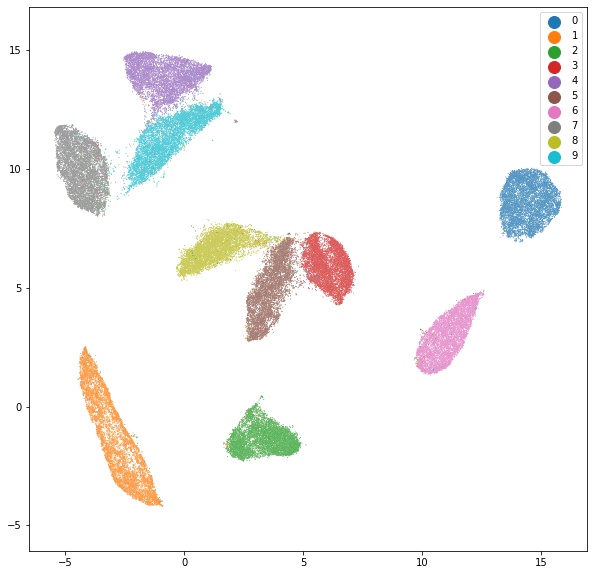

In [4]:
make_plot(embeddings,labels,marker_size=1)

## EVALUATE  METRICS

In [5]:
knn_accuracy(embeddings,labels)

(0.9674357142857142, 0.0009665053818066639)

In [6]:
input1, labels1 = get_dataset("coil20",sample_percent=0.2)
embedding1 = reducer.fit_transform(input1)

input2, labels2 = get_dataset("coil20")
embedding2 = reducer.fit_transform(input2)
embedding2 = embedding2[0:int(0.2*len(embedding2)) ]
labels2 =  labels2[0:int(0.2*len(labels2)) ]

# compute the metric
stability(embedding1, embedding2)

0.054222293

In [14]:
input, labels = get_dataset(name="mnist", sample_percent=0.02)
reducer = umap.UMAP(min_dist=0.05, n_neighbors=20)
embeddings = reducer.fit_transform(input)

(70000, 784)
(70000,)


In [15]:
stress(input, embeddings)

13211411622177.652

In [16]:
strain(input, embeddings)

44689628808.15625

## EXPLORE BEHAVIOUR AS  EMBEDDING DIMENSION INCREASES

In [6]:
D, labels = get_dataset(name="mnist", sample_percent = 0.02858, normalize=True, dis_mat=True, perturbation="noise")

(70000, 784)
(70000,)


In [7]:
knns = []
knns_lb = []
for dim in tqdm(range(2, 500, 10 )):
  
    embedder = umap.UMAP(min_dist=0.05, n_neighbors=20, metric='precomputed',n_components=dim)
    embeddings = embedder.fit_transform(D**2)
    knns.append(knn_accuracy(embeddings, labels ))
    
    embedder = umap.UMAP(min_dist=0.05, n_neighbors=20, metric='precomputed',n_components=dim)
    embeddings = embedder.fit_transform(lower_bound(D, dim)**2)
    knns_lb.append(knn_accuracy(embeddings, labels ))

  0%|                                                                                 | 0/50 [00:00<?, ?it/s]C:\tools\miniconda3\envs\pytorch\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
C:\Users\VukadinoviM\Documents\UCLA\Scientific Computing\DimRedMath270\algorithms.py:70: UserWarning: torch.symeig is deprecated in favor of torch.linalg.eigh and will be removed in a future PyTorch release.
The default behavior has changed from using the upper triangular portion of the matrix by default to using the lower triangular portion.
L, _ = torch.symeig(A, upper=upper)
should be replaced with
L = torch.linalg.eigvalsh(A, UPLO='U' if upper else 'L')
and
L, V = torch.symeig(A, eigenvectors=True)
should be replaced with
L, V = torch.linalg.eigh(A, UPLO='U' if upper else 'L') (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\B

C:\tools\miniconda3\envs\pytorch\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
 28%|████████████████████▏                                                   | 14/50 [03:53<11:41, 19.50s/it]C:\tools\miniconda3\envs\pytorch\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
C:\tools\miniconda3\envs\pytorch\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
 30%|█████████████████████▌                                                  | 15/50 [04:14<11:33, 19.81s/it]C:\tools\miniconda3\envs\pytorch\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; invers

C:\tools\miniconda3\envs\pytorch\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
 58%|█████████████████████████████████████████▊                              | 29/50 [11:21<11:55, 34.07s/it]C:\tools\miniconda3\envs\pytorch\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
C:\tools\miniconda3\envs\pytorch\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
 60%|███████████████████████████████████████████▏                            | 30/50 [11:53<11:10, 33.51s/it]C:\tools\miniconda3\envs\pytorch\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; invers

C:\tools\miniconda3\envs\pytorch\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
 88%|███████████████████████████████████████████████████████████████▎        | 44/50 [22:13<04:20, 43.49s/it]C:\tools\miniconda3\envs\pytorch\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
C:\tools\miniconda3\envs\pytorch\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
 90%|████████████████████████████████████████████████████████████████▊       | 45/50 [22:55<03:36, 43.23s/it]C:\tools\miniconda3\envs\pytorch\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; invers

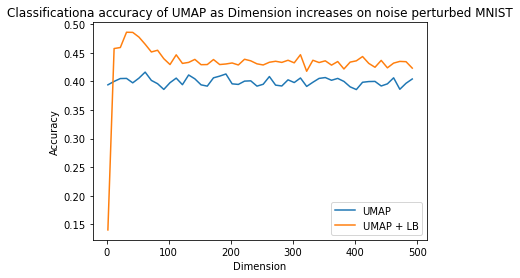

In [20]:

plt.plot(range(2,500,10 ), np.array(knns)[:,0], label='UMAP')
plt.plot(range(2,500,10 ), np.array(knns_lb)[:,0], label='UMAP + LB')
plt.legend()
plt.title("Classificationa accuracy of UMAP as Dimension increases on noise perturbed MNIST")
plt.xlabel("Dimension")
plt.ylabel("Accuracy")
plt.show()